## Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

Null hypothesis: There is no change in latency between previous service provider and new service provider.

Alternative hypothesis: There is a change in latency between the service providers.

    -True positive: Network latency has changed due to change in service providers
    -True negative: Network latency has neither increased or decreased.
    -Type I error: A latency change was shown, but the latency actually hadn't changed.
    -Type II error: There was a change in latency, but we failed to identify it.

- Is the website redesign any good?

Null hypothesis: Daily visitors to the website remain the same.

Alternative hypothesis: Daily visitors to the website have changed.

    -True positive: There is an increase in daily website visitors
    -True negative: Website visitors stay approximately the same.
    -Type I error: There was an increase in daily visitors, but it was caused by an external event.
    -Type II error: We noticed no change in visitors, but we were measuring the wrong metric.

- Is our television ad driving more sales?

Null hypothesis: Sales have stayed the same since the television ad has aired.

Alternative hypothesis: Sales have changed since the airing of the ad.

    -True positive: The ad caused sales to either increase or decrease.
    -True negative: The ad had no effect on sales.
    -Type I error: We viewed a change in sales, but in reality the ad had no effect.
    -Type II error: The ad had an effect, but we couldn't observe any direct change.

----

## Comparison of Groups

In [199]:
# standard data imports
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#pulling sample dataset
from pydataset import data

#new library for stats
from scipy import stats

1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
    
    
|  | Codeup Student | Not Codeup Student |
| --- | --- | --- |
| Uses a Macbook | 49 | 20 |
| Doesn't Use A Macbook | 1 | 30 |

$H_0$: Using a Macbook and being a Codeup student are unrelated to each other (independent)

$H_a$: Using a Macbook and being a Codeup student *are* related to each other (dependent)

In [14]:
# Create the table
observed = pd.DataFrame(
{
    'CodeupStudent':[49,1],
    'NotCodeupStudent':[20,30]
},index=['Uses a Macbook',"Doesn't Use A Macbook"]
)
observed

,CodeupStudent,NotCodeupStudent
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [15]:
# Set our alpha
alpha = 0.05

In [16]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [17]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [18]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


2. Choose another 2 categorical variables from the `mpg` dataset.

In [20]:
# Import the dataset
mpg = data('mpg')
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [21]:
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
167,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact
165,subaru,forester awd,2.5,2008,4,auto(l4),4,18,23,p,suv
80,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
219,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
204,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
221,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
53,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
199,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


In [22]:
# Cycling through variables to explore value counts
# mpg['class'].describe()

- State your null and alternative hypotheses.

$H_0$: The number of cylinders in a vehicle are unrelated to the class of vehicle.

$H_a$: The number of cylinders in a vehicle *are* related to the class of vehicle.

- State your alpha.

In [25]:
alpha = 0.05

- Perform a $chi2$ test of independence.    

In [27]:
observed = pd.crosstab(mpg.cyl,mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [28]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

- State your conclusion

In [30]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


We conclude that there *is* a relationship between the class of the car and the cylinders.

3. Use the data from the employees database to answer these questions:

In [33]:
# Pull the tables from the database
url = env.get_db_url('employees')

query = '''
SELECT * FROM employees
JOIN dept_emp
    USING(emp_no)
JOIN departments
    USING(dept_no)
'''

employees = pd.read_sql(query,url)

In [34]:
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10011,1953-11-07,Mary,Sluis,F,1990-01-22,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: An employee's gender is independent of whether they work in sales or marketing

$H_a$: An employee's gender is *not* independent of whether they work in sales or marketing

In [36]:
# Saving as new dataframe since I might need the old one still
dept_bool = (employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')
current_bool = employees.to_date.astype(str) == '9999-01-01'
curr_emp = employees[current_bool & dept_bool]
curr_emp.sample(5)

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
162490,d001,469899,1954-05-14,Make,Streng,F,1988-09-12,1992-10-05,9999-01-01,Marketing
314211,d007,299979,1953-03-18,Satoru,Kornyak,F,1991-06-16,1991-06-16,9999-01-01,Sales
304220,d007,243200,1959-09-03,Isaac,Constantine,F,1989-06-11,1989-06-11,9999-01-01,Sales
146519,d001,41664,1964-03-21,Leaf,Khamsi,M,1987-02-15,1996-05-24,9999-01-01,Marketing
294024,d007,94049,1958-09-12,Dung,Barinka,M,1992-04-26,1992-04-26,9999-01-01,Sales


In [37]:
# Save the crosstab into observed variable
observed = pd.crosstab(curr_emp.gender,curr_emp.dept_name).T
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [38]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [39]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


We conclude that there is no relationship between gender and whether the employee has worked in Sales or Marketing.

- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: An employee's gender is independent of whether they are or have been a manager.

$H_a$: An employee's gender is *not* independent of whether they are or have been a manager.

In [42]:
# Read new query

query = '''
SELECT *
FROM dept_manager
'''

manager = pd.read_sql(query,url)
manager.sample(10)

,emp_no,dept_no,from_date,to_date
8,110386,d004,1992-08-02,1996-08-30
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
23,111939,d009,1996-01-03,9999-01-01
19,111534,d008,1991-04-08,9999-01-01
12,110725,d006,1985-01-01,1989-05-06
22,111877,d009,1992-09-08,1996-01-03
16,111035,d007,1985-01-01,1991-03-07
13,110765,d006,1989-05-06,1991-09-12
11,110567,d005,1992-04-25,9999-01-01


In [43]:
# Join employees with manager
emp_manager = employees.merge(manager,how='left',on='emp_no')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date_x,to_date_x,dept_name,dept_no_y,from_date_y,to_date_y
133345,d003,211523,1957-07-01,Shaz,Baaz,F,1994-08-07,1998-08-24,9999-01-01,Human Resources,NaN,NaN,NaN
282505,d007,28095,1958-10-08,Stabislas,Armand,M,1995-10-25,1995-10-25,1999-02-22,Sales,NaN,NaN,NaN
99031,d005,463877,1952-11-02,Raimond,Comte,M,1990-01-21,1998-06-27,2001-08-16,Development,NaN,NaN,NaN
47337,d005,93148,1955-06-14,Chrisa,Wallrath,M,1998-06-05,1998-06-05,2000-08-05,Development,NaN,NaN,NaN
302330,d007,232428,1961-04-24,Erez,Gonthier,M,1989-03-03,1994-03-09,9999-01-01,Sales,NaN,NaN,NaN
187471,d004,103012,1955-02-25,Anyuan,Gulak,F,1991-04-13,1997-09-01,9999-01-01,Production,NaN,NaN,NaN
75125,d005,280285,1961-05-27,Ebbe,Lindqvist,F,1985-11-10,1985-11-10,1989-07-28,Development,NaN,NaN,NaN
155289,d001,263477,1960-03-11,Tomofumi,Sherertz,M,1989-06-22,1989-06-22,9999-01-01,Marketing,NaN,NaN,NaN
124783,d002,467474,1964-03-09,Vasiliy,Demian,M,1989-03-08,1989-09-03,9999-01-01,Finance,NaN,NaN,NaN
233325,d004,480559,1957-06-18,Otilia,Xiaoshan,F,1989-09-05,1999-01-05,9999-01-01,Production,NaN,NaN,NaN


In [44]:
# Do some cleanup
emp_manager = emp_manager.rename(columns={
    'from_date_x':'dept_from_date',
    'from_date_y':'mgr_from_date',
    'to_date_x':'dept_to_date',
    'to_date_y':'mgr_to_date',
})

emp_manager = emp_manager.drop(columns=['dept_no_y','is_mgr'],errors='ignore')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_from_date,dept_to_date,dept_name,mgr_from_date,mgr_to_date
101237,d005,471590,1956-08-03,Geraldo,Plotkin,F,1998-02-22,1998-04-03,9999-01-01,Development,NaN,NaN
266812,d008,222596,1963-03-19,Rafols,Schaap,F,1995-08-24,1995-08-24,9999-01-01,Research,NaN,NaN
216477,d004,411986,1958-06-17,Venkatesan,Lieblein,F,1994-03-30,1994-03-30,9999-01-01,Production,NaN,NaN
180858,d004,75918,1954-07-06,Maik,Rodiger,M,1988-07-07,1993-07-29,9999-01-01,Production,NaN,NaN
88605,d005,427186,1954-06-04,Feixiong,Vieth,M,1998-01-12,1999-12-20,2002-04-23,Development,NaN,NaN
32613,d005,41579,1961-03-25,Zito,Siochi,F,1993-10-03,1999-07-14,9999-01-01,Development,NaN,NaN
273812,d008,420770,1952-10-18,Candido,Pietrzykowski,M,1987-06-14,1997-01-28,9999-01-01,Research,NaN,NaN
51428,d005,107504,1955-09-01,Shao,Hoppenstand,F,1985-08-07,1986-06-22,9999-01-01,Development,NaN,NaN
325751,d007,466392,1954-02-16,Chikara,Servieres,M,1990-05-17,1995-12-01,1998-07-16,Sales,NaN,NaN
289822,d007,69665,1952-02-29,Uzi,Fioravanti,M,1985-09-20,1985-09-20,9999-01-01,Sales,NaN,NaN


In [45]:
emp_manager['has_been_mgr'] = np.where(emp_manager.mgr_to_date.isna(),False,True)
emp_manager.has_been_mgr.value_counts()

has_been_mgr
False    331579
True         24
Name: count, dtype: int64

In [46]:
observed = pd.crosstab(emp_manager.gender,emp_manager.has_been_mgr)
observed

has_been_mgr,False,True
gender,,
F,132740,13
M,198839,11


In [47]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [48]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


We conclude that there is no relationship between an employee's gender and whether they have or have not been a manager.

-----

## Correlations

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

Lengths of arms and feet are continuous variables, so **correlation test**

- Does smoking affect when or not someone has lung cancer?

Smoking is a categorical variable. Having lung cancer is also a categorical variable. Therefore, it is a **proportion test**.

- Is gender independent of a person’s blood type?

Gender is a categorical variable. A person's blood type is also categorical. Therefore, it is a **proportion test**.

- Does whether or not a person has a cat or dog affect whether they live in an apartment?

A person owning a cat/dog is categorical, same as living in an apartment. Therefore, this is a **proportion test**.

- Does the length of time of the lecture correlate with a student's grade?

Length of the lecture is continuous. Assuming the student's grade is measured by a *numerical index* and not an *alphabetical index*, then the student's grade is a continuous variable, and so it is a **correlation test**.

2. Use the `telco_churn` data.

In [64]:
url = env.get_db_url('telco_churn')
pd.read_sql('show tables',url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


- Does tenure correlate with monthly charges?

$H_0$: There is *no* correlation between monthly charges and tenure

$H_a$: There *is* a relationship between monthly charges and tenure

In [66]:
customers = pd.read_sql('select * from customers',url)
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


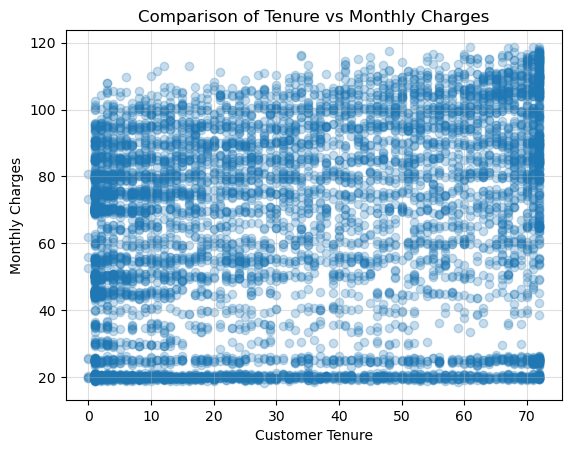

In [67]:
# Let's plot it, see if we notice anything
plt.scatter(customers.tenure,customers.monthly_charges,alpha=0.25)
plt.title('Comparison of Tenure vs Monthly Charges')
plt.xlabel('Customer Tenure')
plt.ylabel('Monthly Charges')

plt.grid(alpha=0.4)

plt.show()

In [68]:
r,p = stats.pearsonr(customers.tenure,customers.monthly_charges)
print(f'r = {r}')
print(f'p = {p}')

r = 0.24789985628615246
p = 4.094044991476844e-99


In [69]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We reject the null hypothesis, so there may be a relationship between tenure and monthly charges.

- Total charges?

$H_0$: There is no correlation between the tenure and total charges

$H_a$: There is some correlation between tenure and total charges.

In [72]:
# Found errors in plotting, so need to fix them
customers.total_charges = pd.to_numeric(customers.total_charges,errors='coerce')

# Drop nulls, nas, etc.
# customers.total_charges = customers.total_charges.dropna()
customers = customers.dropna()

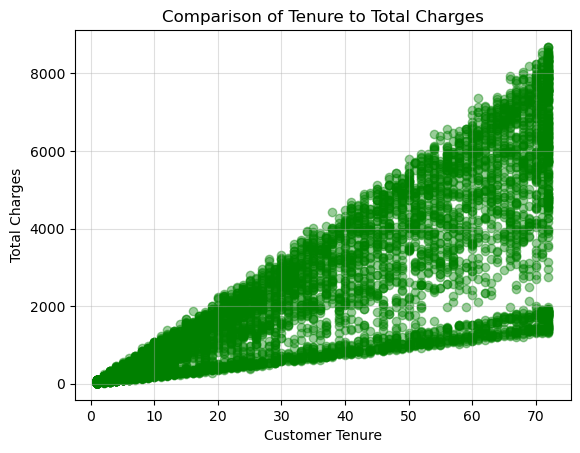

In [73]:
# Plotting tenure against total charges this time
plt.scatter(customers.tenure,customers.total_charges,alpha=0.4,color='green')
plt.title('Comparison of Tenure to Total Charges')
plt.xlabel('Customer Tenure')
plt.ylabel('Total Charges')

plt.grid(alpha=0.4)

plt.show()

In [74]:
# It looks like there is a correlation, so let's confirm
r,p = stats.pearsonr(customers.tenure,customers.total_charges)

In [75]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We conclude that there *is* a relationship between the tenure and total charges

- What happens if you control for phone and internet service?

In [78]:
# Create new dataframes to control for phone
yes_phone = customers[customers.phone_service == 'Yes']
no_phone = customers[customers.phone_service == 'No']

In [79]:
# Create new dataframes to control for internet service
customers.internet_service_type_id.value_counts()
internet2 = customers[customers.internet_service_type_id == 2]
internet1 = customers[customers.internet_service_type_id == 1]
internet3 = customers[customers.internet_service_type_id == 3]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


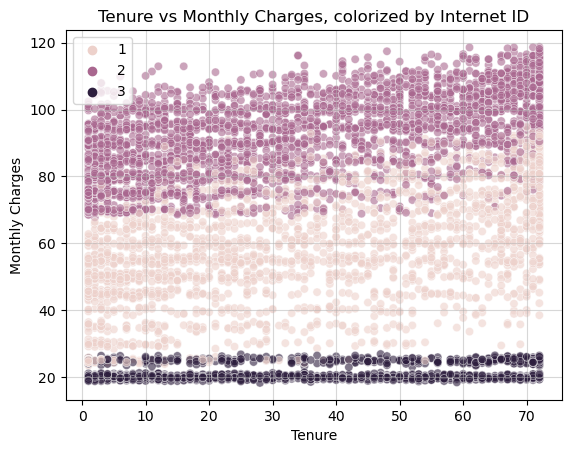

In [80]:
# Make some plots!
sns.scatterplot(customers,x='tenure',y='monthly_charges',alpha=0.6,hue=customers.internet_service_type_id)
plt.title('Tenure vs Monthly Charges, colorized by Internet ID')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

plt.legend()
plt.grid(alpha=0.5)

plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

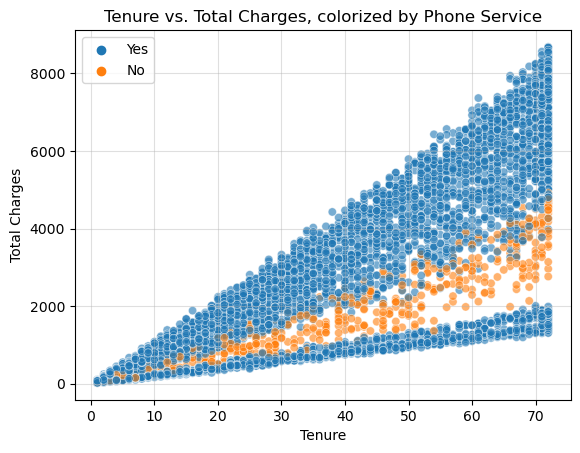

In [81]:
sns.scatterplot(customers,x='tenure',y='total_charges',alpha=0.6,hue=customers.phone_service)
plt.title('Tenure vs. Total Charges, colorized by Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

plt.legend()
plt.grid(alpha=0.4)

plt.show()

In [82]:
# Looking at phone first
r,p = stats.pearsonr(yes_phone.tenure,yes_phone.monthly_charges)
print('Phone = "Yes"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "Yes"; Monthly Charges
r = 0.24419396575193317
p = 6.828016037587985e-87


In [83]:
r,p = stats.pearsonr(no_phone.tenure,no_phone.monthly_charges)
print('Phone = "No"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "No"; Monthly Charges
r = 0.5924298640568981
p = 1.173273903289394e-65


In [84]:
r,p = stats.pearsonr(yes_phone.tenure,yes_phone.total_charges)
print('Phone = "Yes"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "Yes"; Total Charges
r = 0.8298393210699468
p = 0.0


In [85]:
r,p = stats.pearsonr(no_phone.tenure,no_phone.total_charges)
print('Phone = "No"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "No"; Total Charges
r = 0.9534228506954511
p = 0.0


In [86]:
r,p = stats.pearsonr(internet1.tenure,internet1.monthly_charges)
print('Internet ID = "1"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "1"; Monthly Charges
r = 0.5197012004433117
p = 2.8895185791429484e-167


In [87]:
r,p = stats.pearsonr(internet2.tenure,internet2.monthly_charges)
print('Internet ID = "2"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "2"; Monthly Charges
r = 0.6246206176175593
p = 0.0


In [88]:
r,p = stats.pearsonr(internet3.tenure,internet3.monthly_charges)
print('Internet ID = "3"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "3"; Monthly Charges
r = 0.3461877354857482
p = 4.896604599961622e-44


In [89]:
r,p = stats.pearsonr(internet1.tenure,internet1.total_charges)
print('Internet ID = "1"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "1"; Total Charges
r = 0.9411848215629808
p = 0.0


In [90]:
r,p = stats.pearsonr(internet2.tenure,internet2.total_charges)
print('Internet ID = "2"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "2"; Total Charges
r = 0.9853093528070621
p = 0.0


In [91]:
r,p = stats.pearsonr(internet3.tenure,internet3.total_charges)
print('Internet ID = "3"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "3"; Total Charges
r = 0.9814648859044293
p = 0.0


In all instances, $p$ is less than $\alpha$, and therefore in all instances we can reject the null hypothesis and conclude that there is a relationship between tenure and total charges and tenure and monthly charges, regardless of phone or internet service.

3. Use the `employees` database.

In [94]:
# Reset url for employees database and show tables
url = env.get_db_url('employees')
pd.read_sql('show tables',url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


- Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: There is no relationship between how long an employee has been with the company and their salary.

$H_a$: There is a relationship between how long an employee has been with the company and their salary.

In [323]:
# Pull relevant data for question
df = pd.read_sql('''
select *
from employees
join salaries
	using(emp_no)
''',url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [325]:
len(df)

2844047

In [327]:
# Isolate employees so that we can get the difference between to_date and hire_date
df = df.sort_values(['emp_no','hire_date','to_date'],ascending=[True,True,False]).drop_duplicates(subset='hire_date',keep='first')

In [343]:
df['is_current'] = df.to_date.astype(str) == '9999-01-01'
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,is_current
16,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,True
22,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,True
29,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,True
45,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,True
58,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,True
...,...,...,...,...,...,...,...,...,...,...
2675924,482240,1959-06-08,Guozhong,Renear,F,1999-12-12,78568,2001-12-11,9999-01-01,True
2699248,484695,1953-07-23,Marit,Katiyar,F,1999-07-08,65804,2001-09-11,9999-01-01,True
2701277,484908,1962-10-22,Willard,Noriega,M,1999-09-15,46735,2001-09-28,9999-01-01,True
2721430,487022,1956-06-26,Zhiguo,Baezner,M,1999-11-26,62409,2002-01-12,9999-01-01,True


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the `sleepstudy` data.

In [333]:
sleepstudy = data('sleepstudy')

- Is there a relationship between days and reaction time?

---------

## Comparison of Means